<a href="https://colab.research.google.com/github/rakshan-bhat/Image_recognition-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

## lets import everything we need here
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [ ]:
## lets import the inbuilt dataset first
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print(f"Training Images Shape: {x_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


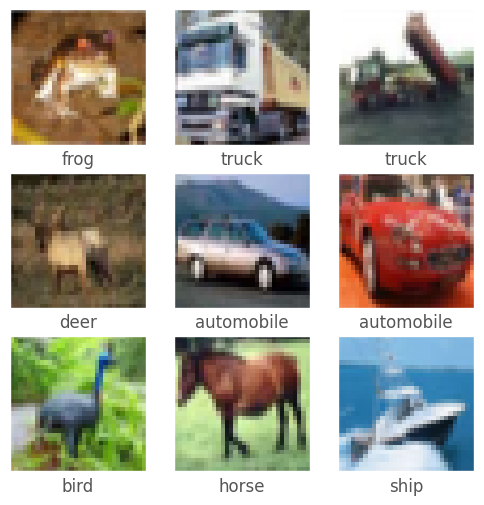

In [ ]:
## lets get the class labels first from the website
NUM_CLASSES = 10
classes = [
           'airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck'
           ]


## visualize the dataset
plt.figure(figsize=(6, 6))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show();



In [ ]:
## normalize the images

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# just checking to confirm
x_train[0].dtype, x_train[0].max(), x_train[0].min()



(dtype('float32'), 1.0, 0.0)

In [ ]:
## one hot encode the labels -- we currently have integer labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


y_train[0].shape, y_test[0].shape

((10,), (10,))

In [ ]:
## lets build the model
model = Sequential()

Top (convolution) part of the model


In [ ]:
## add our first convolutional layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1), ## with this stride and 'same' padding output remains same as input
    padding='same',  ## 'valid' means no padding -- 'same' padding applies additional padding
    activation='relu',
    input_shape=(32, 32, 3)
))

model.add(MaxPool2D(2, 2))


## add our second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPool2D(2, 2))

## add our third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,640 (111.88 KB)

 Trainable params: 28,640 (111.88 KB)

 Non-trainable params: 0 (0.00 B)

Bottom (classification) part of the model

In [ ]:
# flatten the output from conv layers
model.add(Flatten())


## let check the output again it should be 64*8*8 = 4096
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,640 (111.88 KB)

 Trainable params: 28,640 (111.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Flatten name=flatten, built=True>]

In [ ]:
model.layers[-1].output.shape ## check output of the last (flatten) layer

(None, 4096)

In [ ]:

## now lets add Dense layers
model.add(Dense(256, activation='relu'))

## output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,080,042 (4.12 MB)

 Trainable params: 1,080,042 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = Adam(learning_rate=0.01)


In [ ]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the model

In [ ]:
NUM_EPOCHS = 50
BATCH_SIZE = 128


history = model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1748 - loss: 2.2673 - val_accuracy: 0.3982 - val_loss: 1.6854
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4167 - loss: 1.6321 - val_accuracy: 0.4549 - val_loss: 1.5116
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4721 - loss: 1.4724 - val_accuracy: 0.4768 - val_loss: 1.4645
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4988 - loss: 1.3979 - val_accuracy: 0.4870 - val_loss: 1.4185
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5194 - loss: 1.3411 - val_accuracy: 0.4886 - val_loss: 1.4302
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5259 - loss: 1.3180 - val_accuracy: 0.4965 - val_loss: 1.4080
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5487 - loss: 1.2646 - val_accuracy: 0.4871 - val_loss: 1.4334
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5645 - loss: 1.2188 - val_accuracy: 

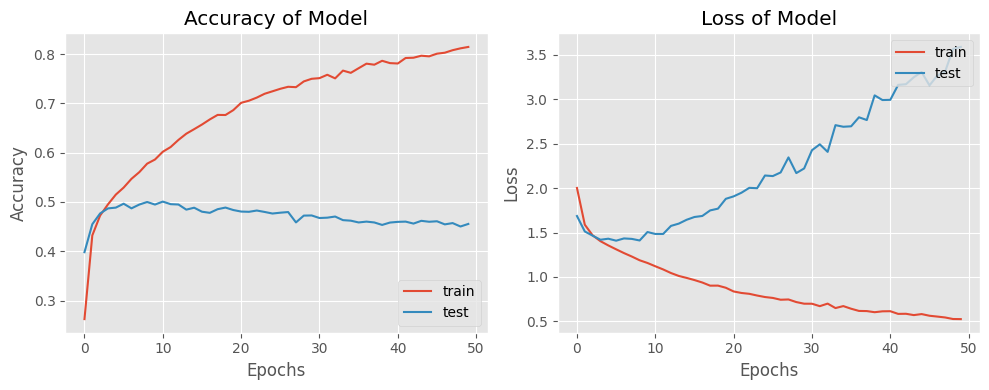

In [ ]:
## function to plot loss and accuracy

def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();


plot_history(history)

For overfitting

In [ ]:
model2 = Sequential()


## first layer
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPool2D((2, 2)))

## second conv layer
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3)) ## dropout layer with 30% dropout rate

## third layer
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3)) ## dropout layer with 30% dropout rate

## flatten
model2.add(Flatten())

## dense layer one
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))

## output layer
model2.add(Dense(NUM_CLASSES, activation='softmax'))


model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,290 (1.23 MB)

 Trainable params: 321,290 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

To add a simple learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler


# learning rate schedule
def simple_decay(epoch, lr):

  if epoch < 30:
    lrate = lr
  elif epoch < 60:
    lrate = 0.0005
  else:
    lrate = 0.0001
  return lrate


## create scheduler
scheduler = LearningRateScheduler(simple_decay)


callbacks = [scheduler]


optimizer = Adam(learning_rate=0.001)


model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


history2 = model2.fit(x_train, y_train, epochs=100,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)


Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2779 - loss: 1.9342 - val_accuracy: 0.5240 - val_loss: 1.3276 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5086 - loss: 1.3636 - val_accuracy: 0.5856 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5703 - loss: 1.2034 - val_accuracy: 0.6377 - val_loss: 1.0252 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6132 - loss: 1.0839 - val_accuracy: 0.6763 - val_loss: 0.9377 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6454 - loss: 1.0008 - val_accuracy: 0.6958 - val_loss: 0.8862 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6653 - loss: 0.9434 - val_accuracy: 0.7071 - val_loss: 0.8397 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6854 - loss: 

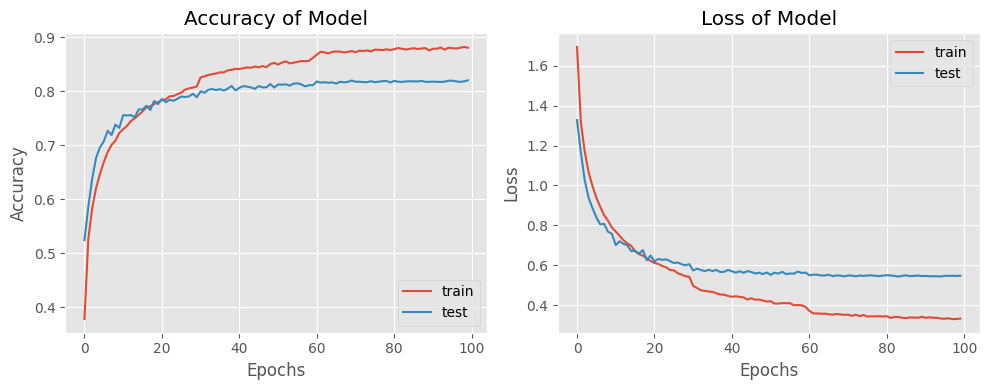

In [ ]:

plot_history(history2)